In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv(r'C:\Users\sande\earthquake_data_tsunami.csv')


In [4]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [5]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [6]:
df.describe()
df = df.drop(columns=['mmi', 'cdi', 'Month'])


In [7]:
df.shape

(782, 10)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,f1_score
import seaborn as sns

x = df.drop(columns=['tsunami'])
y=df.iloc[:,-1]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)


In [9]:
y

0      1
1      0
2      1
3      1
4      1
      ..
777    0
778    0
779    0
780    0
781    0
Name: tsunami, Length: 782, dtype: int64

In [10]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)


C:\Users\sande\anaconda3\envs\ml100\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
ypred=lr.predict(xtest)

In [12]:
f1_score(ytest,ypred)

0.7478260869565218

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# scaler=StandardScaler()

# scaler.fit_transform(xtrain)
# scaler.transform(xtest)

In [15]:
 accuracy_score(ytest, ypred)


0.8152866242038217

<h1>using scaling</h1>

In [16]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
from sklearn.ensemble import RandomForestClassifier

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(xtrain_scaled, ytrain)
y_pred_scaled = model_scaled.predict(xtest_scaled)

In [17]:
accuracy_score(ytest,y_pred_scaled)

0.8535031847133758

In [18]:
f1_score(ytest,y_pred_scaled)

0.7927927927927928

<h1>improved voth f1 and accuarcy

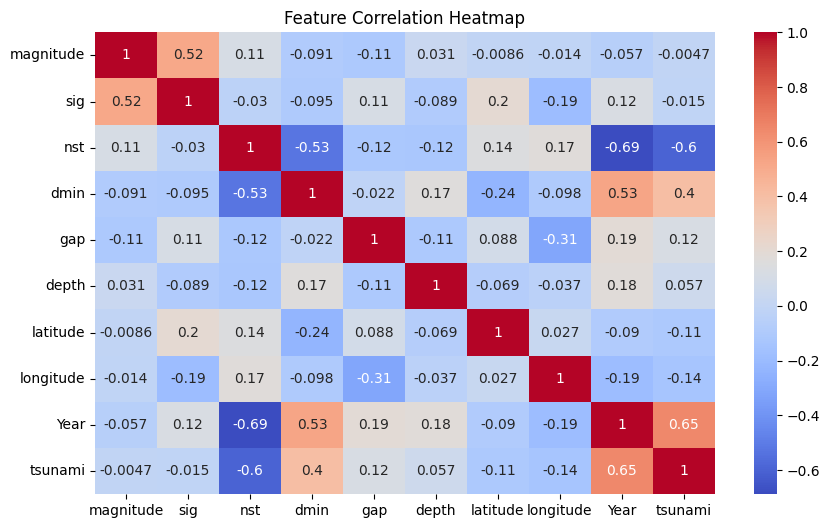

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


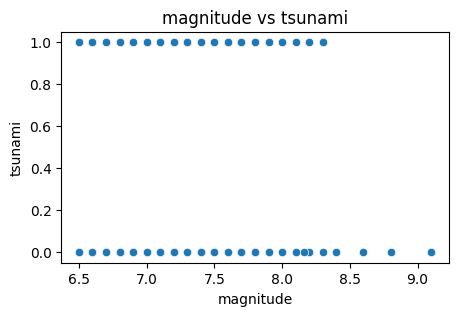

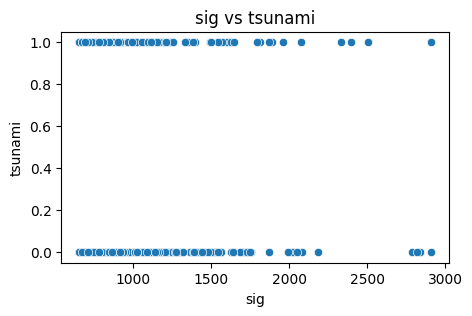

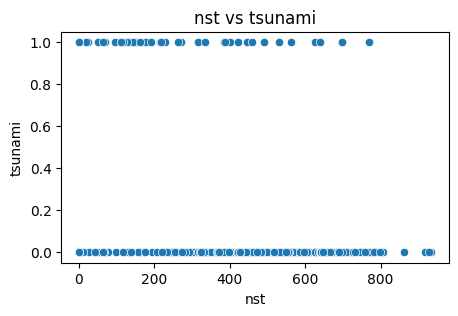

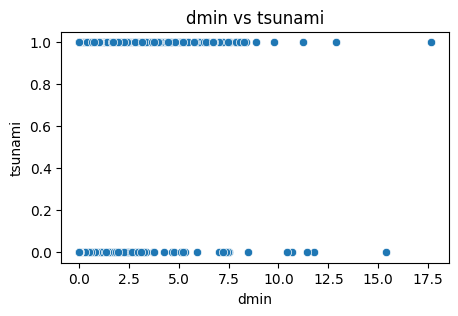

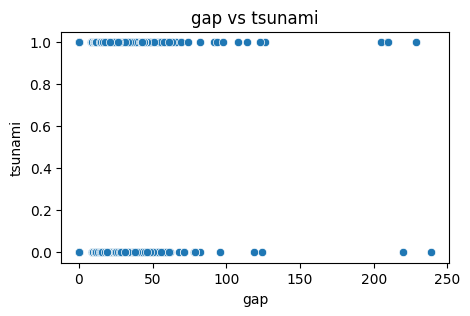

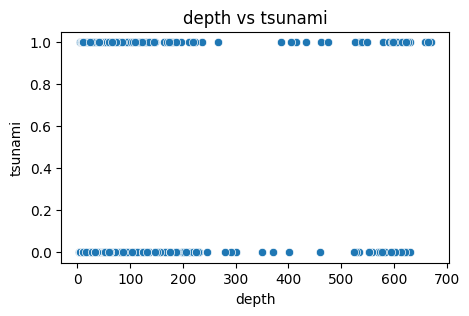

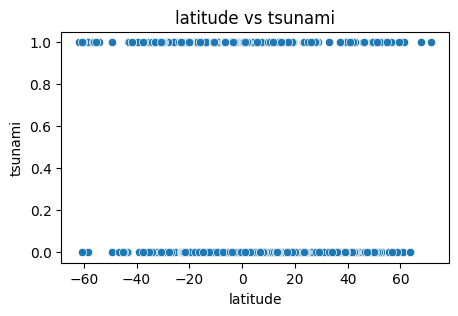

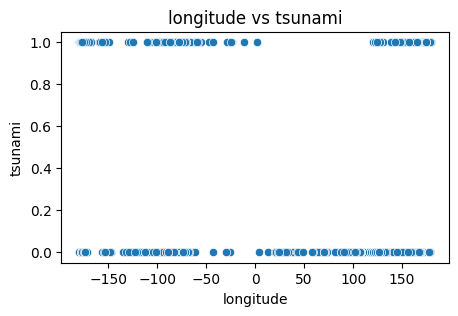

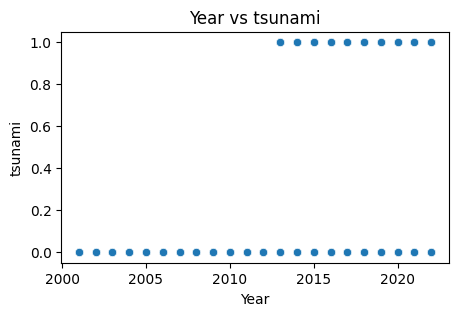

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in x.columns:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[col], y=df['tsunami'])
    plt.title(f'{col} vs tsunami')
    plt.show()


<h1>using Random forest
    

In [21]:



from sklearn.ensemble import RandomForestClassifier


In [22]:
rf=RandomForestClassifier()

In [23]:
accuracy_score(ytest,ypred)

0.8152866242038217

In [24]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
rf.fit(xtrain_scaled,ytrain)
ypred=rf.predict(xtest_scaled)
accuracy_score(ytest,ypred)


0.9490445859872612

In [25]:



df['tsunami'].value_counts() 

tsunami
0    478
1    304
Name: count, dtype: int64

In [26]:
df.corr()['tsunami']

magnitude   -0.004726
sig         -0.015500
nst         -0.600231
dmin         0.400752
gap          0.116360
depth        0.056814
latitude    -0.113209
longitude   -0.136778
Year         0.647211
tsunami      1.000000
Name: tsunami, dtype: float64

In [27]:
df.to_csv("preprocessed_tsunami.csv", index=False)
